In [1]:
import autograd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

import torch

# Data

In [2]:
_data = np.pi * (np.random.rand(10000, 1) * 2 - 1)
_label = np.cos(_data) + 2 

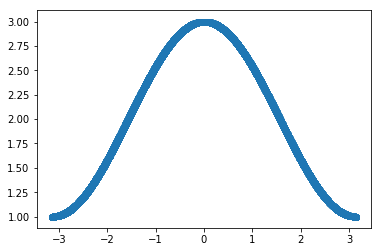

In [3]:
plt.scatter(_data, _label)

# Pytorch

In [4]:
m = torch.nn.Linear(1, 32)
print(list(m.parameters())[1])

Parameter containing:
tensor([ 0.9597,  0.5155,  0.7434, -0.8263, -0.6370, -0.9747,  0.0690,  0.2401,
         0.8444,  0.8264,  0.8300, -0.0027,  0.7465, -0.3420, -0.9850, -0.0757,
        -0.3406, -0.8088,  0.8230,  0.7766, -0.8913, -0.7748,  0.9604,  0.1349,
        -0.6898, -0.5009, -0.1875,  0.2522,  0.2692,  0.3493, -0.9025, -0.4512],
       requires_grad=True)


0 5.429818630218506
100 0.05498639494180679
200 0.006998400669544935
300 0.0016915980959311128
400 0.0009676376357674599


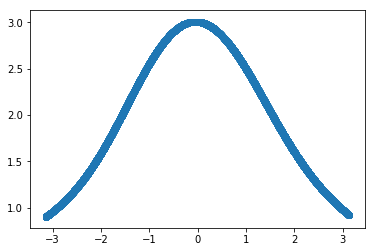

In [5]:
mm = torch.nn.Sequential(torch.nn.Linear(1, 32), 
                         torch.nn.Tanh(), 
                         torch.nn.Linear(32, 32),
                         torch.nn.Tanh(),
                         torch.nn.Linear(32, 1))

def train(mm):
    
    data = torch.tensor(_data, dtype=torch.float32)
    label = torch.tensor(_label, dtype=torch.float32)
    
    for i in range(500):
        
        out = mm(data)
        loss = ((out-label)**2).mean()
        
        mm.zero_grad()
        loss.backward()
        for p in mm.parameters():
            p.data.sub_(0.01 * p.grad.data)

        if i % 100 == 0:
            print(i, loss.item())

train(mm)


plt.scatter(_data, mm(torch.tensor(_data, dtype=torch.float32)).data.numpy())

# Tensor

In [6]:
class Model(autograd.Module):
    def __init__(self, ):
        super().__init__()
        self.l1 = autograd.Linear(1, 32)
        self.l2 = autograd.Linear(32, 32)
        self.l3 = autograd.Linear(32, 1)
    
        self.w1 = autograd.Parameter(1, 32)
        self.b1 = autograd.Parameter(32)
        self.w2 = autograd.Parameter(32, 32)
        self.b2 = autograd.Parameter(32)
        self.w3 = autograd.Parameter(32, 1)
        self.b3 = autograd.Parameter(1)
        
    def forward(self, data):
        out = autograd.tanh(self.l1(data))
        out = autograd.tanh(self.l2(out))
        out = self.l3(out)
        # out = autograd.relu(data @ self.w1 + self.b1)
        # out = autograd.relu(out @ self.w2 + self.b2)
        # out = out @ self.w3 + self.b3
        
        return out

In [7]:
model = Model()
for n, p in model.named_parameters():
    print(n, p.shape, id(p), p.sum())
    break

Model.b1 (32,) 140424629539840 Tensor(1.044195154078638, requires_grad=True)


0 3.6379323223085653
100 0.00867574935793387
200 0.0028610376841026303
300 0.002076719856386954
400 0.0018108022416019668


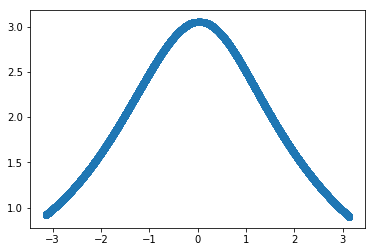

In [8]:
model = Model()

def train(model):
    
    data = autograd.Tensor(_data)
    label = autograd.Tensor(_label)

    lr = 0.01
    
    for i in range(500):
        
        model.zero_grad()
        
        out = model(data)
        loss = ((out - label) ** 2).mean()
        loss.backward()
        
        for p in model.parameters():
            p.sub_(p.grad * lr)
            
        if i % 100 == 0:
            print(i, loss.data)

train(model)

plt.scatter(_data, model(autograd.Tensor(_data)).data)

# Variable

0 4.67392365771463
100 0.023335623417750816
200 0.007384159650484909
300 0.004892505168816985
400 0.004043567826384181


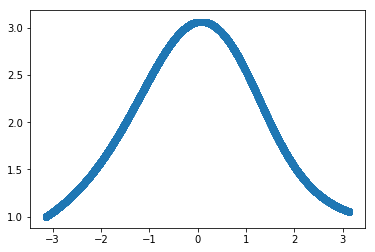

In [9]:
from autograd import variable

class Model(variable.Module):
    def __init__(self, ):
        super().__init__()
        self.l1 = variable.Linear(1, 32)
        self.l2 = variable.Linear(32, 32)
        self.l3 = variable.Linear(32, 1)
        
    def forward(self, data):
        out = variable.Tanh()(self.l1(data))
        out = variable.Tanh()(self.l2(out))
        out = self.l3(out)
        
        return out


def train(model):
    
    data = variable.Variable(_data)
    label = variable.Variable(_label)

    lr = 0.01
    
    for i in range(500):
        
        model.zero_grad()
        
        out = model(data)
        loss = ((out - label) ** 2).mean()
        loss.backward()
        
        for p in model.parameters():
            p.data -= p.grad * lr
            
        if i % 100 == 0:
            print(i, loss.data)

            
model = Model()
train(model)

plt.scatter(_data, model(variable.Variable(_data)).data)

# Linear

In [10]:
import torch
print(torch.__version__)

1.7.1+cpu


In [11]:
a = np.random.rand(3, 10)
b = np.random.rand(10, 4)
c = np.random.rand(4)

In [12]:
x = torch.tensor(a, requires_grad=True)
m = torch.tensor(b, requires_grad=True)
k = torch.tensor(c, requires_grad=True)
y = x @ m + k
y = y.mean()
y.backward()

print(x.grad)
print(m.grad)
print(k.grad)

tensor([[0.1382, 0.0792, 0.2112, 0.1647, 0.1564, 0.1886, 0.1453, 0.1169, 0.1560,
         0.1043],
        [0.1382, 0.0792, 0.2112, 0.1647, 0.1564, 0.1886, 0.1453, 0.1169, 0.1560,
         0.1043],
        [0.1382, 0.0792, 0.2112, 0.1647, 0.1564, 0.1886, 0.1453, 0.1169, 0.1560,
         0.1043]], dtype=torch.float64)
tensor([[0.0333, 0.0333, 0.0333, 0.0333],
        [0.1747, 0.1747, 0.1747, 0.1747],
        [0.1369, 0.1369, 0.1369, 0.1369],
        [0.1128, 0.1128, 0.1128, 0.1128],
        [0.1444, 0.1444, 0.1444, 0.1444],
        [0.0168, 0.0168, 0.0168, 0.0168],
        [0.0994, 0.0994, 0.0994, 0.0994],
        [0.1420, 0.1420, 0.1420, 0.1420],
        [0.1250, 0.1250, 0.1250, 0.1250],
        [0.0998, 0.0998, 0.0998, 0.0998]], dtype=torch.float64)
tensor([0.2500, 0.2500, 0.2500, 0.2500], dtype=torch.float64)


In [13]:
x = autograd.Tensor(a, requires_grad=True)
m = autograd.Tensor(b, requires_grad=True)
k = autograd.Tensor(c, requires_grad=True)
y = x @ m + k
y = y.mean()
y.backward()

print(x.grad)
print(m.grad)
print(k.grad)

Tensor([[0.13818461 0.07920095 0.21117229 0.16473638 0.15644586 0.18855303
  0.14527528 0.11687758 0.15599843 0.10431363]
 [0.13818461 0.07920095 0.21117229 0.16473638 0.15644586 0.18855303
  0.14527528 0.11687758 0.15599843 0.10431363]
 [0.13818461 0.07920095 0.21117229 0.16473638 0.15644586 0.18855303
  0.14527528 0.11687758 0.15599843 0.10431363]], requires_grad=False)
Tensor([[0.03333414 0.03333414 0.03333414 0.03333414]
 [0.17465337 0.17465337 0.17465337 0.17465337]
 [0.13691941 0.13691941 0.13691941 0.13691941]
 [0.11279815 0.11279815 0.11279815 0.11279815]
 [0.14444965 0.14444965 0.14444965 0.14444965]
 [0.01682851 0.01682851 0.01682851 0.01682851]
 [0.0994069  0.0994069  0.0994069  0.0994069 ]
 [0.14195311 0.14195311 0.14195311 0.14195311]
 [0.1250042  0.1250042  0.1250042  0.1250042 ]
 [0.09980081 0.09980081 0.09980081 0.09980081]], requires_grad=False)
Tensor([0.25 0.25 0.25 0.25], requires_grad=False)


In [14]:
x = torch.tensor(a, requires_grad=True)

y = torch.tanh(x)
y.mean().backward()

print(x.grad)

tensor([[0.0323, 0.0157, 0.0202, 0.0327, 0.0321, 0.0333, 0.0258, 0.0234, 0.0319,
         0.0143],
        [0.0329, 0.0316, 0.0278, 0.0162, 0.0189, 0.0324, 0.0330, 0.0165, 0.0178,
         0.0326],
        [0.0329, 0.0153, 0.0269, 0.0303, 0.0200, 0.0333, 0.0243, 0.0320, 0.0273,
         0.0332]], dtype=torch.float64)


In [15]:
x = autograd.Tensor(a, requires_grad=True)

y = autograd.tanh(x)
y.mean().backward()

print(x.grad)

Tensor([[0.0322976  0.01565063 0.02020412 0.03269194 0.03205446 0.03331738
  0.02582642 0.02337349 0.03186428 0.01434074]
 [0.03291687 0.03160246 0.02778925 0.01620015 0.01890252 0.03243408
  0.03299562 0.01650919 0.01782803 0.03259716]
 [0.03293589 0.015344   0.02687146 0.03027607 0.01999406 0.03332651
  0.02432995 0.03201171 0.02730601 0.03319807]], requires_grad=False)


# Conv

In [16]:
data = np.random.rand(10, 3, 5, 5).astype(np.float32)
# print(data)

In [17]:
tensor = torch.tensor(data, requires_grad=True)
conv = torch.nn.Conv2d(3, 10, kernel_size=3, stride=2, padding=1, padding_mode='zeros')

out = conv(tensor)
print(out.shape)
print(out.mean())

out.mean().backward()
# print(out)

print(conv.weight.grad.sum())
print(conv.bias.grad.sum())

torch.Size([10, 10, 3, 3])
tensor(-0.0811, grad_fn=<MeanBackward0>)
tensor(8.1243)
tensor(1.0000)


In [18]:
from autograd import variable

conv2 = variable.Conv2d(3, 10, kernel_size=3, stride=2, padding=1)
conv2.weight.data = conv.weight.data.numpy()
conv2.bias.data = conv.bias.data.numpy()

var = variable.Variable( data, requires_grad=True ) 
out2 = conv2(var)

print(out2.shape)
print(out2.mean().data)

out2.mean().backward()
# print(out2.data)

print(conv2.weight.grad.sum())
print(conv2.bias.grad.sum())

(10, 10, 3, 3)
-0.08108129704887436
8.124268380432234
0.9999999999999999


In [19]:
np.testing.assert_almost_equal(conv.weight.grad.data.numpy(), conv2.weight.grad, decimal=2)
np.testing.assert_almost_equal(conv.bias.grad.data.numpy(), conv2.bias.grad, decimal=2)

In [20]:
np.testing.assert_almost_equal(tensor.grad.data.numpy(), var.grad, decimal=2)

# Pool

## MaxPool

In [21]:
data = np.random.rand(10, 3, 5, 5).astype(np.float32)
# print(data)

In [22]:
maxpool = torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
tensor = torch.tensor(data, requires_grad=True)
out = maxpool(tensor)
print('maxpool, ', out.sum())

out.mean().backward()
print(tensor.grad.sum())

maxpool,  tensor(229.4844, grad_fn=<SumBackward0>)
tensor(1.)


In [23]:
from autograd import variable

var = variable.Variable(data, requires_grad=True)
pool2 = variable.Pool2d(kernel_size=3, stride=2, padding=1)
out = pool2(var)

print(out.sum().data)

out.mean().backward()
print(var.grad.sum())

229.48436081409454
1.0


In [24]:
np.testing.assert_almost_equal(tensor.grad.data.numpy(), var.grad, decimal=2)

## AvgPool

In [25]:
tensor = torch.tensor(data, requires_grad=True)

avgpool = torch.nn.AvgPool2d(kernel_size=3, stride=2, padding=1)
out = avgpool(tensor)
print('avgpool, ', out.sum())

out.mean().backward()
print(tensor.grad.sum())

avgpool,  tensor(84.7041, grad_fn=<SumBackward0>)
tensor(0.6049)


In [26]:
from autograd import variable

var = variable.Variable(data, requires_grad=True)
pool2 = variable.Pool2d(kernel_size=3, stride=2, padding=1, mode='avg')

out = pool2(var)

print(out.sum().data)

out.mean().backward()
print(var.grad.sum())

84.70408635544462
0.60493827


In [27]:
np.testing.assert_almost_equal(tensor.grad.data.numpy(), var.grad, decimal=2)

# BN

In [1]:
from autograd import variable
import torch
import numpy as np

In [2]:
bn_var = variable.BatchNorm2d(8, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True, training=True)
bn = torch.nn.BatchNorm2d(8, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True)

In [3]:
print(bn.weight.data.numpy())
print(bn.bias.data.numpy())
print(' ----------- ')
print(bn_var.weight.data)
print(bn_var.bias.data)

[1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0.]
 ----------- 
[1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
from autograd import variable
import torch
import numpy as np

data = np.random.rand(3, 8, 10, 10).astype(np.float32)
bn = torch.nn.BatchNorm2d(8, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True)
bn_var = variable.BatchNorm2d(8, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True, training=True)

t = torch.tensor(data, requires_grad=True)
out_t = bn(t)
out_t.mean().backward()

print('-------------------------')

v = variable.Variable(data, requires_grad=True)
out_v = bn_var(v)
out_v.mean().backward()

np.testing.assert_almost_equal(out_t.data.numpy(), out_v.data, decimal=4)
np.testing.assert_almost_equal(bn.running_mean.data.numpy(), bn_var.running_mean, decimal=4)
np.testing.assert_almost_equal(bn.running_var.data.numpy(), bn_var.running_var, decimal=4)
np.testing.assert_almost_equal(bn.weight.data.numpy(), bn_var.weight.data, decimal=4)
np.testing.assert_almost_equal(bn.bias.data.numpy(), bn_var.bias.data, decimal=4)
np.testing.assert_almost_equal(t.grad.data.numpy(), v.grad, decimal=4)

-------------------------


In [5]:
print(bn.weight.grad.mean())
print(bn.bias.grad.mean())

tensor(4.9063e-10)
tensor(0.1250)


In [6]:
print(bn_var.weight.grad.mean())
print(bn_var.bias.grad.mean())

3.9561462014187565e-09
0.12499999999999999


In [7]:
t = torch.tensor(data, requires_grad=True)
x = t**2 / t * 4
x.mean(dim=(0, 2, 3)).sum().backward()


v = variable.Variable(data, requires_grad=True)
y = v**2 / v * 4
y.mean(axis=(0, 2, 3)).sum().backward()

np.testing.assert_almost_equal(t.grad.data.numpy(), v.grad, decimal=3)

In [8]:
t.var(dim=(0,2,3))

tensor([0.0788, 0.0860, 0.0773, 0.0831, 0.0885, 0.0852, 0.0869, 0.0818],
       grad_fn=<VarBackward1>)

In [9]:
((v - v.mean(axis=(0, 2, 3), keepdims=True))**2).mean(axis=(0, 2, 3)).data

array([0.07856907, 0.0857521 , 0.07700616, 0.08283585, 0.0881689 ,
       0.08492072, 0.08660536, 0.08151963], dtype=float32)

In [10]:
data.var(axis=(0, 2, 3))

array([0.07856907, 0.0857521 , 0.07700616, 0.08283585, 0.0881689 ,
       0.08492072, 0.08660536, 0.08151963], dtype=float32)

In [11]:
t.grad.data.numpy().sum()

32.0

In [12]:
v.grad.sum()

32.000004